<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/vision3d/text2mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==1.12.1+cu116 torchvision==0.13.1+cu116 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu116

In [ ]:
!pip install git+https://github.com/openai/CLIP.git@d50d76daa670286dd6cacf3bcd80b5e4823fc8e1

In [ ]:
!git clone --recursive https://github.com/NVIDIAGameWorks/kaolin
%cd kaolin
!git checkout v0.13.0
!python setup.py develop
%cd ..

In [ ]:
!git clone https://github.com/threedle/text2mesh
%cd text2mesh

In [13]:
obj_path = "data/source_meshes/person.obj"  #@param {type: "string"}
n_iter = 750  #@param {type: "integer"}
prompt = "a 3D rendering of a hero in unreal engine"
output_dir = "./results001"

In [14]:
!python main.py --run branch \
                --obj_path {obj_path} \
                --output_dir {output_dir} \
                --prompt "{prompt}" \
                --sigma 12.0  --clamp tanh --n_normaugs 4 --n_augs 1 --normmincrop 0.1 --normmaxcrop 0.4 \
                --geoloss --colordepth 2 --normdepth 2 --frontview --frontview_std 4 --clipavg view \
                --lr_decay 0.9 --clamp tanh --normclamp tanh  --maxcrop 1.0 --save_render --seed 29 \
                --n_iter {n_iter}  --learning_rate 0.0005 --normal_learning_rate 0.0005 --standardize --no_pe --symmetry --background 1 1 1

ModuleList(
  (0): FourierFeatureTransform()
  (1): Linear(in_features=515, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=256, bias=True)
  (8): ReLU()
  (9): Linear(in_features=256, out_features=256, bias=True)
  (10): ReLU()
)
ModuleList(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=3, bias=True)
)
ModuleList(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=1, bias=True)
)
  0% 0/750 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. 

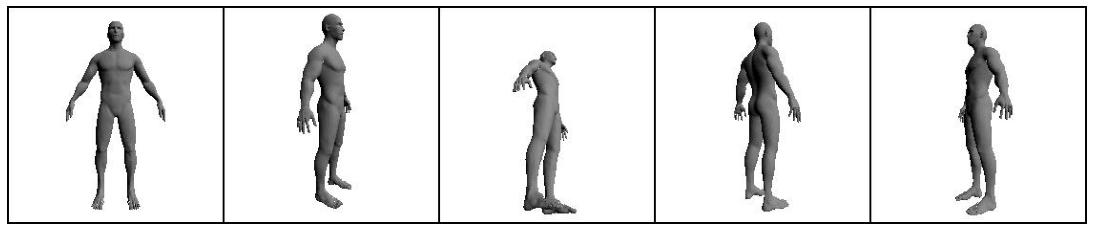

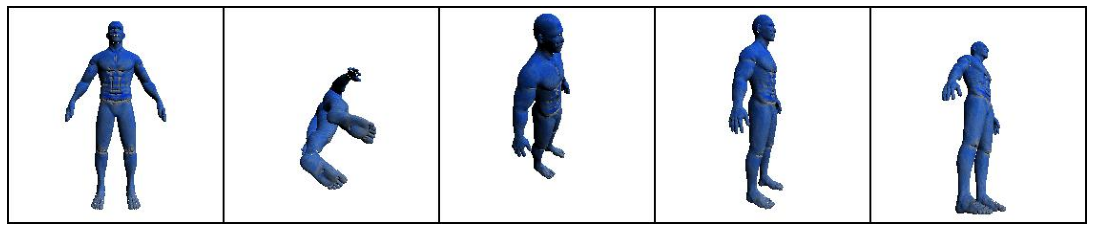

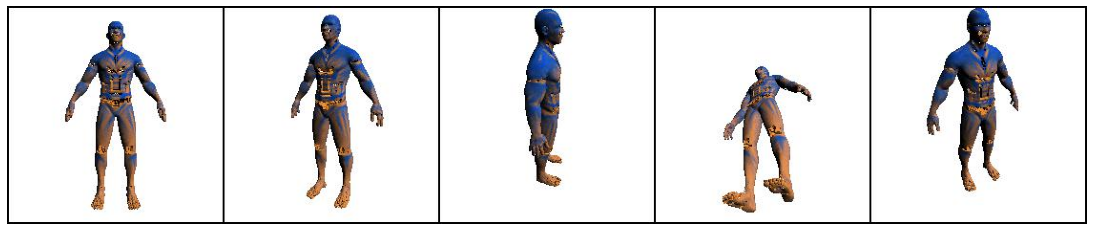

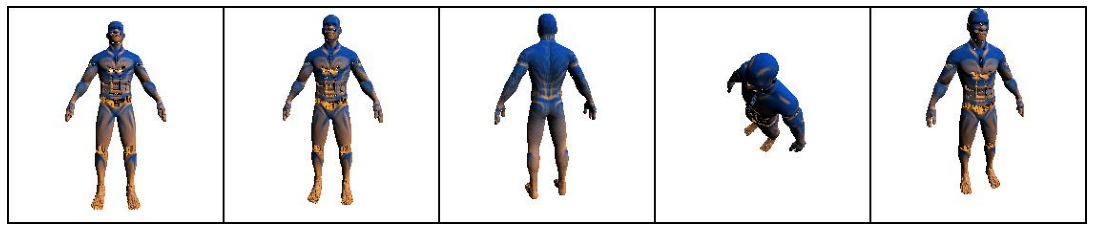

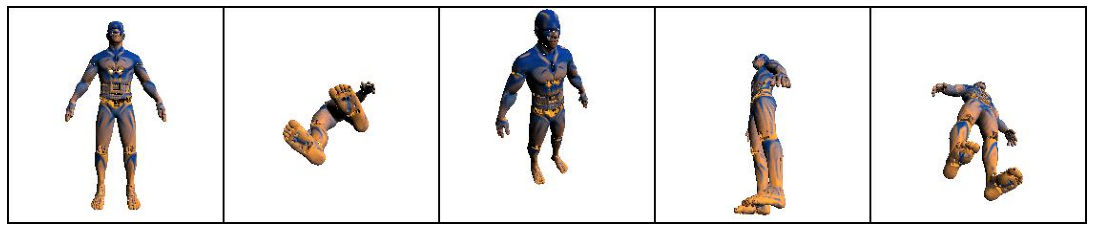

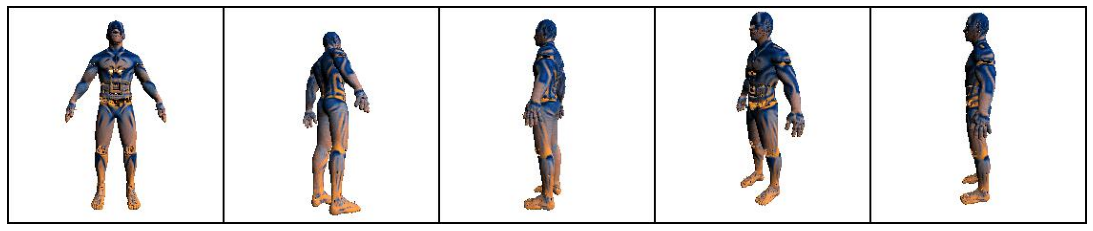

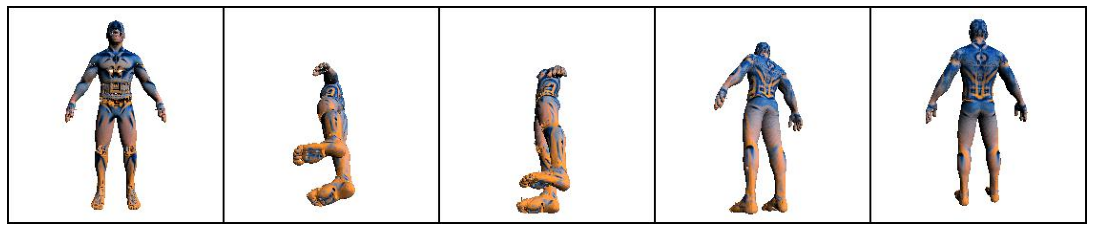

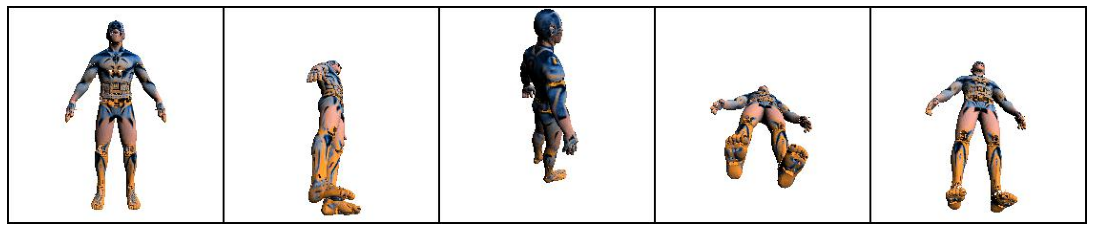

In [15]:
import matplotlib.pyplot as plt
import importlib
import PIL
importlib.reload(PIL.TiffTags)
import cv2
import os


frames = []
for i in range(0, n_iter, 100):
    img = cv2.imread(os.path.join(output_dir, f"iter_{i}.jpg"))
    frames.append(img)
    plt.figure(figsize=(20, 4))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()